# Setting up the envrionment

Loading in the required packages (note you may need to add them using Pkg.add first). Multi-fractal functions can be loaded in using the include statement.

In [87]:
using DataFrames, CSV, Polynomials, GLM, Unitful, Statistics, Plots, Loess

include("../multi_fractals.jl");

# Creating some data

The function below creates a multifractal timeseries of data. It takes three arguements:
- length_ts: the length of the timeseries
- cascade_steps: the number of cascade steps to use
- distribution: the type of distribution to draw from

Using these parameters it performs a cascade process to create a multifractal timeseries. For each step in the cascade, it divides the time series into segments of a certain length (`segment_length`), and multiplies each segment by a random number drawn from `distribution`. The length of the segments decreases with each step of the cascade, starting from `length_ts` and halving at each step (down to a minimum of 1). This introduces long-range correlations into the data.

In [88]:
using Random, Distributions

function generate_multifractal_ts(length_ts, cascade_steps, distribution)
    ts = rand(length_ts)  # Start with a normal random time series
    for step in 1:cascade_steps
        segment_length = max(length_ts ÷ 2^step, 1)
        for i in 1:segment_length:length_ts
            multiplier = rand(distribution)
            ts[i:min(i+segment_length-1, length_ts)] .*= multiplier
        end
    end
    return ts
end

# Parameters
length_ts = 2^13 # 8192
cascade_steps = 10
distribution = LogNormal(0, 0.5)  # Example distribution

# Generate the time series
ts = generate_multifractal_ts(length_ts, cascade_steps, distribution)


8192-element Vector{Float64}:
  0.2269714997668358
  0.35189150349592835
  1.0268224155695307
  0.06924125810186461
  0.5617379959479943
  0.30140239119432016
  0.1702727663947335
  0.7351306714905788
  0.6254963919153823
  0.24465813799873445
  ⋮
 10.629574442307703
  8.834141488512996
 13.05969559426884
  1.5943730740727609
  8.833079723618901
  2.5454214618859377
  8.350000717626141
 18.347652495029145
  2.9370686321019663

## Chhabra Jensen method

Below is the implementation of the Chhabra Jensen (direct) method for calculating the multifractal spectrum. 

See: Chhabra A, Jensen RV. Direct determination of the f(α) singularity spectrum. Physical Review Letters. 1989;62(12):1327–1330. doi:10.1103/PhysRevLett.62.1327.

 It takes 4 arguements:
- ts: the timeseries to calculate the spectrum
- qValues: the order of the spectrum to calculate
- scales: the scales to calculate the spectrum over
- plot (kwarg): whether to plot the spectrum or not

In [89]:
# parameters
qValues = LinRange(-15,15,31)
exponents = LinRange(2,8,7)
scales = round.(2 .^exponents)

# call the function
cj_results = ChhabraJensen(ts, qValues, scales; plot = true)

Dict{String, Any} with 9 entries:
  "alpha"       => [1.85932, 1.85913, 1.8588, 1.85828, 1.85748, 1.85625, 1.8544…
  "Rsqr_Dq"     => [0.990701, 0.990706, 0.990713, 0.990723, 0.99074, 0.990767, …
  "Rsqr_alpha"  => [0.990622, 0.990604, 0.990577, 0.990534, 0.990467, 0.990358,…
  "falpha"      => [-0.0373095, -0.0345008, -0.0301096, -0.0236279, -0.014396, …
  "plot"        => Plot{Plots.GRBackend() n=2}
  "Rsqr_falpha" => [0.0902599, 0.0726539, 0.0523401, 0.0305724, 0.0107472, 0.00…
  "q"           => LinRange{Float64}(-15.0, 15.0, 31)
  "mfw"         => 1.38295
  "Dq"          => [1.74078, 1.73289, 1.72388, 1.71352, 1.70149, 1.68736, 1.670…

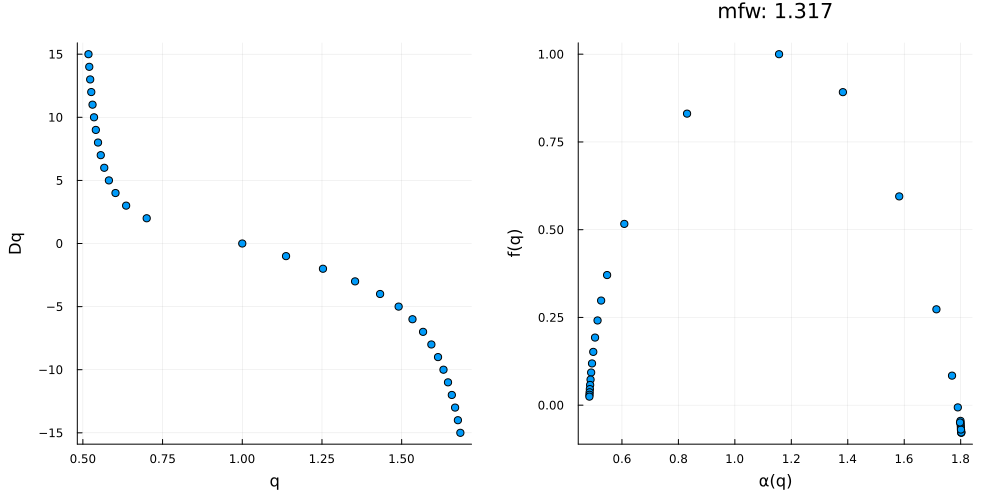

In [81]:
cj_results["plot"] |> display

## MFDFA

Below is the implementation of the MFDFA method for calculating the multifractal spectrum. 

See: Kantelhardt JW, Zschiegner SA, Koscielny-Bunde E, Havlin S, Bunde A, Stanley HE. Multifractal detrended fluctuation analysis of nonstationary time series. Physica A: Statistical Mechanics and its Applications. 2002;316(1-4):87–114. doi:10.1016/S0378-4371(02)01383-3.

It takes five arguements:
- ts: the timeseries to calculate the spectrum
- q: the order of the spectrum to calculate
- scale: the scale to calculate the spectrum over
- m: the order of the polynomial to use in the detrending
- plot (kwarg): whether to plot the spectrum or not


In [90]:
qValues = LinRange(-15,15,31)
exponents = LinRange(2,8,7)
scales = round.(2 .^exponents)
m = 1

mfdfa_results = mfdfa(ts, qValues, scales, m; plot = true)

Dict{String, Any} with 9 entries:
  "figure" => Plot{Plots.GRBackend() n=2}
  "Hq_r2"  => [0.977331, 0.977221, 0.977096, 0.976957, 0.976801, 0.976631, 0.97…
  "hq"     => [1.94237, 1.94249, 1.94251, 1.9424, 1.94204, 1.9413, 1.93993, 1.9…
  "Fq"     => [0.000360589 0.00316246 … 0.19887 1.944; 0.00037392 0.00326787 … …
  "Hq"     => [1.86896, 1.86372, 1.85766, 1.85059, 1.84224, 1.83226, 1.82015, 1…
  "q"      => LinRange{Float64}(-15.0, 15.0, 31)
  "mfw"    => 1.21323
  "tq"     => [-29.0344, -27.092, -25.1496, -23.207, -21.2646, -19.3226, -17.38…
  "Dq"     => [-0.101147, -0.10275, -0.10313, -0.101741, -0.0978341, -0.0903932…

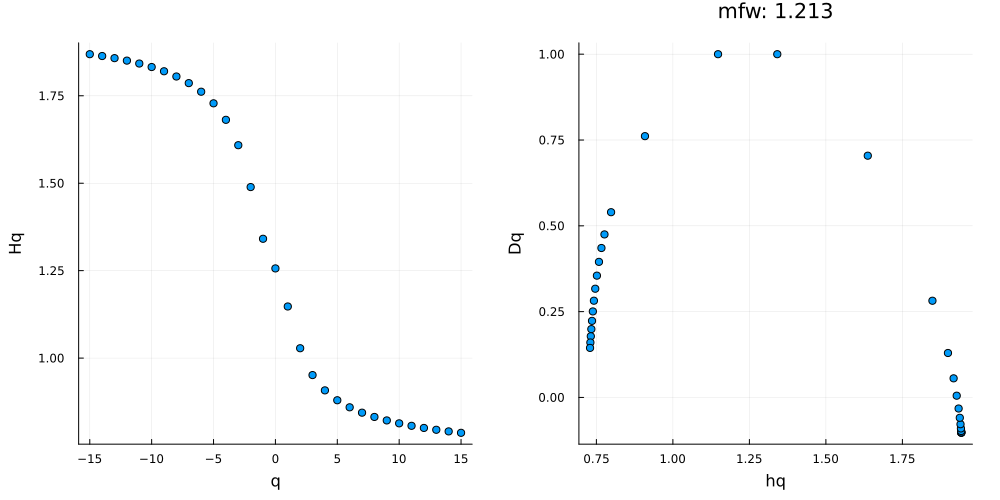

In [91]:
mfdfa_results["figure"] |> display